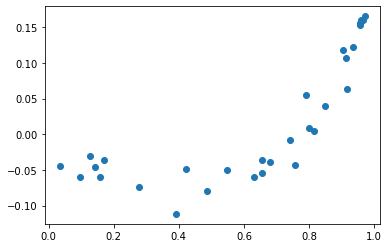

In [11]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('polydata.mat')
# print([key for key in in_data]) 

n_train = np.size(y_train)

x_train = in_data['a']
y_train = in_data['b']

plt.scatter(x=x_train,y=y_train)

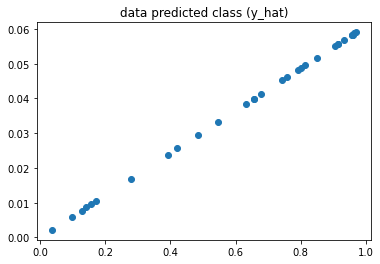

In [36]:
## Classifier 1 -> p=1

# w = (X^T X)^(-1)X^T y
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = x_train@w_opt

plt.scatter(x=x_train, y=y_hat)
plt.title('data predicted class (y_hat)')
plt.show()

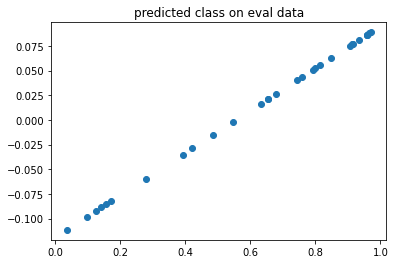

In [41]:
## p = 1
x_train_1 = np.hstack((x_train, np.ones((n_train,1)) ))

w_opt_1 = np.linalg.inv(x_train_1.transpose()@x_train_1)@x_train_1.transpose()@y_train
y_hat_1 = x_train_1@w_opt_1

plt.scatter(x=x_train, y=y_hat_1)
plt.title('predicted class on eval data')
plt.show()

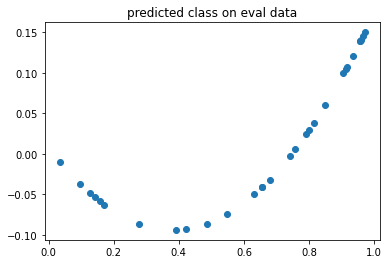

In [42]:
## p = 2
x_train_2 = np.hstack((x_train**2, x_train, np.ones((n_train,1)) ))

w_opt_2 = np.linalg.inv(x_train_2.transpose()@x_train_2)@x_train_2.transpose()@y_train
y_hat_2 = x_train_2@w_opt_2

plt.scatter(x=x_train, y=y_hat_2)
plt.title('predicted class on eval data')
plt.show()

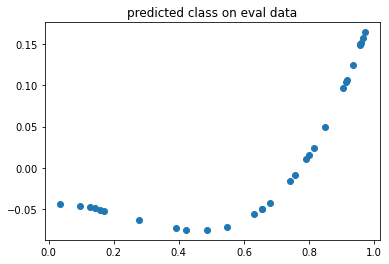

In [43]:
## p = 3
x_train_3 = np.hstack((x_train**3,x_train**2, x_train, np.ones((n_train,1)) ))

w_opt_3 = np.linalg.inv(x_train_3.transpose()@x_train_3)@x_train_3.transpose()@y_train
y_hat_3 = x_train_3@w_opt_3

plt.scatter(x=x_train, y=y_hat_3)
plt.title('predicted class on eval data')
plt.show()

In [1]:
import numpy as np

def gram_schmidt(B):
    """Orthogonalize a set of vectors stored as the columns of matrix B."""
    # Get the number of vectors.
    m, n = B.shape
    # Create new matrix to hold the orthonormal basis
    U = np.zeros([m,n]) 
    for j in range(n):
        # To orthogonalize the vector in column j with respect to the
        # previous vectors, subtract from it its projection onto
        # each of the previous vectors.
        v = B[:,j].copy()
        for k in range(j):
            v -= np.dot(U[:, k], B[:, j]) * U[:, k]
        if np.linalg.norm(v)>1e-10:
            U[:, j] = v / np.linalg.norm(v)
    return U

if __name__ == '__main__':
    B1 = np.array([[1.0, 1.0, 0.0], [2.0, 2.0, 0.0], [2.0, 2.0, 1.0]])
    A1 = gram_schmidt(B1)
    print(A1)
    A2 = gram_schmidt(np.random.rand(4,2)@np.random.rand(2,5))
    print(A2.transpose()@A2)

[[ 0.33333333  0.         -0.2981424 ]
 [ 0.66666667  0.         -0.59628479]
 [ 0.66666667  0.          0.74535599]]
[[ 1.00000000e+00 -2.91433544e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.91433544e-16  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


In [69]:
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('movie.mat')
x_data = in_data['X']
x_size = np.size(x_data)

X = np.hstack((np.ones((5,1)), x_data))
gram_schmidt(X)

[[ 4.47213595e-01 -3.65148372e-01 -6.32455532e-01 -5.16397779e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.20934382e-14]
 [ 4.47213595e-01  5.47722558e-01  3.16227766e-01 -3.87298335e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-01]
 [ 4.47213595e-01 -3.65148372e-01  2.24693342e-15  6.45497224e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00000000e-01]
 [ 4.47213595e-01  5.47722558e-01 -3.16227766e-01  3.87298335e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.00000000e-01]
 [ 4.47213595e-01 -3.65148372e-01  6.32455532e-01 -1.29099445e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.00000000e-01]]


In [83]:
import math
t_1 = np.ones((5,1))*(1/math.sqrt(5))
# X ≈ t_1*W

array([[0.4472136],
       [0.4472136],
       [0.4472136],
       [0.4472136],
       [0.4472136]])